# Building & Evaluating the Models

## Importing Data

In [ ]:
import pandas as pd

In [ ]:
data = pd.read_csv("data.csv")

In [ ]:
data

,BEVDICHTE_SQKM_ 2019,AUSLAENDER_ANTEIL_2019,ALTERSVERTEILUNG_ANTEIL_0_19_ 2019,ALTERSVERTEILUNG_ANTEIL_20_64_ 2019,ALTERSVERTEILUNG_ANTEIL_65PLUS_ 2019,PRIVATHAUSHALTE_2019,GESAMTFLAECHE_ SQKM_2016,LANDWIRTSCHAFTSFLAECHE_ANTEIL_2004/09,WALD_GEHOELZE_ANTEIL_2004/09,UNPRODUKTIVE_FLAECHE_ANTEIL_2004/09,...,BESCHAEFTIGTE_ZWEITERRSEKTOR_2018,BESCHAEFTIGTE_DRITTERSEKTOR_2018,NEUWOHNUNGEN_PRO_1000_2018,SOZAILHILFEQUOTE_2019,WAEHLERANTEIL_SP_2019,WAEHLERANTEIL_SVP_2019,AVG_INCOME_PRO_STEUERPFLPERSON,ANZAHL_FAHRZEUGE,ANZAHL_HALTESTELLEN_OV,Anzahl Filialen Migros
0,453.711133,15.839505,20.404554,60.362551,19.232895,3908.0,19.94,53.386854,27.997993,0.501756,...,1462.0,1959.0,4.952167,1.070,10.728960,37.415507,68464.601333,6014.000001,9.0,1.0
1,1764.424635,20.938777,17.383916,64.414642,18.201442,10591.0,12.34,11.407767,32.281553,7.119741,...,3213.0,31646.0,21.957871,3.580,26.428113,16.347677,72516.345149,10976.000000,51.0,4.0
2,584.110971,12.888601,19.624352,59.045769,21.329879,2146.0,7.93,44.206549,29.722922,2.644836,...,799.0,1958.0,3.492687,2.740,14.825120,33.668160,64687.799155,2807.999999,11.0,0.0
3,1899.319728,44.138013,20.475167,65.222063,14.302770,3735.0,4.41,19.318182,31.136364,3.863636,...,1095.0,2356.0,2.602876,4.920,20.964612,34.902522,60540.820872,4758.000002,10.0,1.0
4,466.666667,15.909091,20.541126,60.129870,19.329004,1962.0,9.90,45.795339,35.967579,3.242148,...,570.0,948.0,20.159504,3.920,13.289057,38.645406,65314.566285,2699.000000,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,534.225195,12.583472,21.222871,60.976628,17.800501,1969.0,8.97,54.849498,23.745819,1.449275,...,761.0,1200.0,1.878914,0.610,9.440489,34.137170,80012.956811,3202.000000,9.0,2.0
2138,41.643836,13.190789,16.973684,56.842105,26.184211,1385.0,73.00,54.853705,33.716161,8.025704,...,307.0,1202.0,0.990099,1.330,9.453356,50.826902,58806.567631,1793.000000,29.0,1.0
2139,133.739837,4.863222,27.051672,56.534954,16.413374,125.0,2.46,62.962963,26.337449,0.823045,...,30.0,42.0,12.345679,3.164,9.921044,40.370752,62723.214286,178.000000,1.0,0.0
2140,532.104122,24.419079,20.423971,64.329393,15.246637,1057.0,4.61,33.043478,38.478261,2.826087,...,522.0,550.0,13.253527,3.580,19.854501,33.404062,67304.796663,1612.000000,7.0,1.0


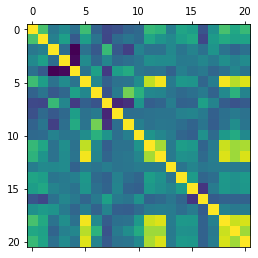

In [ ]:
import matplotlib.pyplot as plt

plt.matshow(data.corr())
plt.show()

In [ ]:
corr = data.corr()
corr[abs(corr)>=0.7].unstack().dropna().drop_duplicates().sort_values(ascending=False)

BEVDICHTE_SQKM_ 2019               BEVDICHTE_SQKM_ 2019                 1.000000
PRIVATHAUSHALTE_2019               BESCHAEFTIGTE_DRITTERSEKTOR_2018     0.972271
                                   ANZAHL_FAHRZEUGE                     0.968456
                                   Anzahl Filialen Migros               0.915845
BESCHAEFTIGTE_DRITTERSEKTOR_2018   ANZAHL_FAHRZEUGE                     0.911089
                                   Anzahl Filialen Migros               0.901345
ANZAHL_FAHRZEUGE                   Anzahl Filialen Migros               0.895100
                                   ANZAHL_HALTESTELLEN_OV               0.862191
BESCHAEFTIGTE_ZWEITERRSEKTOR_2018  ANZAHL_FAHRZEUGE                     0.860905
PRIVATHAUSHALTE_2019               BESCHAEFTIGTE_ZWEITERRSEKTOR_2018    0.838082
                                   ANZAHL_HALTESTELLEN_OV               0.815427
BESCHAEFTIGTE_ZWEITERRSEKTOR_2018  Anzahl Filialen Migros               0.785307
                            

In [ ]:
X = data.drop("Anzahl Filialen Migros", axis=1)
y = data["Anzahl Filialen Migros"]

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.90, random_state=0)

In [ ]:
predictions = pd.DataFrame()
predictions["true"] = y_test

## Training various models

In [ ]:
from sklearn.model_selection import GridSearchCV

### Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
linregModel = LinearRegression().fit(X_train, y_train)

In [ ]:
predictions["linregModel"] = linregModel.predict(X_test)
print(predictions.linregModel[predictions.linregModel < 0].count())
predictions["linregModel"] = predictions["linregModel"].round(0)
predictions.linregModel.clip(lower=0, inplace=True)

215
50


### KNN

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

In [ ]:
knnparams = {'n_neighbors': [2, 3, 5, 10, 20, 50, 75, 100, 200, 500],
          'weights': ['distance', 'uniform'],
          'algorithm':['auto']}

In [ ]:
knnModel = KNeighborsRegressor()
knnModelGS = GridSearchCV(knnModel, param_grid=knnparams).fit(X_train, y_train)

In [ ]:
knnModelGS.best_params_

{'algorithm': 'auto', 'n_neighbors': 5, 'weights': 'uniform'}

In [ ]:
predictions["knnModel"] = knnModelGS.predict(X_test).round(0)

### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
rfparams = {'max_depth': [10, 20, 50, 100],
 'max_features': ['auto'],
 'min_samples_leaf': [1, 2, 4, 8]}

In [ ]:
rfModel = RandomForestRegressor()
rfModelGS = GridSearchCV(rfModel, param_grid=rfparams).fit(X_train, y_train)

In [ ]:
rfModelGS.best_params_

{'max_depth': 50, 'max_features': 'auto', 'min_samples_leaf': 1}

In [ ]:
predictions["rfModel"] = rfModelGS.predict(X_test).round(0)

### XGBRegressor

In [ ]:
from xgboost import XGBRegressor

In [ ]:
xgbrparams = {'objective':['reg:squarederror'],
          'n_estimators': [10, 20, 50, 100],
          'max_depth': [5, 7, 10],
          'eta': [0.01, 0.02, 0.05, 0.1],
          'subsample': [0.6],
          'colsample_bytree': [0.7],
          }

In [ ]:
xgbrModel = XGBRegressor()
xgbrModelGS = GridSearchCV(xgbrModel, param_grid=xgbrparams).fit(X_train, y_train)

In [ ]:
xgbrModelGS.best_params_

{'colsample_bytree': 0.7,
 'eta': 0.01,
 'max_depth': 5,
 'n_estimators': 50,
 'objective': 'reg:squarederror',
 'subsample': 0.6}

In [ ]:
predictions["xgbrModel"] = xgbrModelGS.predict(X_test).round(0)

### Ensemble with uniform weights

In [ ]:
predictions["ensemble"] = predictions[['linregModel', 'knnModel', 'rfModel', 'xgbrModel']].mean(axis=1).round(0)

In [ ]:
print(predictions.linregModel.max())
print(predictions.knnModel.max())
print(predictions.rfModel.max())
print(predictions.xgbrModel.max())
print(predictions.ensemble.max())

12.0
9.0
13.0
14.0
12.0


## Model Evaluation

### Actual vs. Predicted Plot

In [ ]:
from numpy.ma.core import shape
import numpy as np

def actual_pred_graph(predictions, modelName):
  Z = pd.crosstab(predictions[modelName], predictions.true)
  result = pd.DataFrame(0, index=np.arange(0.0, 16.0, 1.0), columns=np.arange(0.0, 16.0, 1.0))
  result = np.log(result.combine(Z, sum, fill_value=0, overwrite=False))
  fig, ax = plt.subplots()
  plt.title(modelName)
  pos = ax.imshow(result)
  fig.colorbar(pos)
  plt.xticks(range(0,16))
  plt.yticks(range(0,16))
  plt.xlabel("Actual")
  plt.ylabel("Predicted")
  plt.gca().invert_yaxis()
  plt.show()

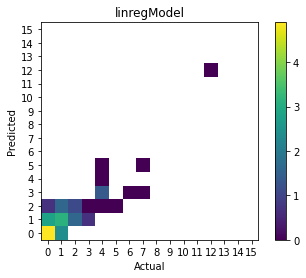

In [ ]:
actual_pred_graph(predictions, "linregModel")

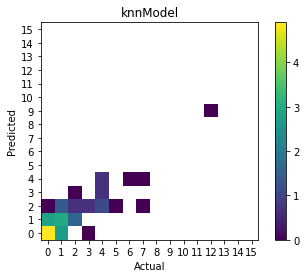

In [ ]:
actual_pred_graph(predictions, "knnModel")

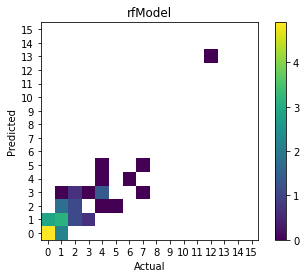

In [ ]:
actual_pred_graph(predictions, "rfModel")

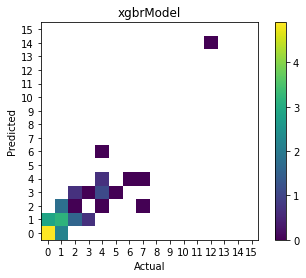

In [ ]:
actual_pred_graph(predictions, "xgbrModel")

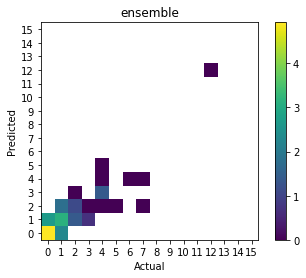

In [ ]:
actual_pred_graph(predictions, "ensemble")

### Model Metrics

In [ ]:
from sklearn.metrics import explained_variance_score, max_error, mean_absolute_error, mean_squared_error, r2_score

MAPE cannot be used here as we have many actuals = 0

In [ ]:
eval = pd.DataFrame(index=predictions.drop("true", axis=1).columns, columns=["explained_variance_score","max_error","mean_absolute_error","mean_squared_error","r2_score"])

In [ ]:
for model in predictions.drop("true", axis=1).columns:
  eval.loc[model,"explained_variance_score"] = explained_variance_score(predictions["true"], predictions[model])
  eval.loc[model,"max_error"] = max_error(predictions["true"], predictions[model])
  eval.loc[model,"mean_absolute_error"] = mean_absolute_error(predictions["true"], predictions[model])
  eval.loc[model,"mean_squared_error"] = mean_squared_error(predictions["true"], predictions[model])
  eval.loc[model,"r2_score"] = r2_score(predictions["true"], predictions[model])

In [ ]:
eval

,explained_variance_score,max_error,mean_absolute_error,mean_squared_error,r2_score
linregModel,0.767378,4.0,0.306977,0.474419,0.76584
knnModel,0.715122,5.0,0.339535,0.590698,0.708448
rfModel,0.786597,4.0,0.293023,0.432558,0.786501
xgbrModel,0.75922,5.0,0.302326,0.488372,0.758953
ensemble,0.770538,5.0,0.283721,0.469767,0.768136


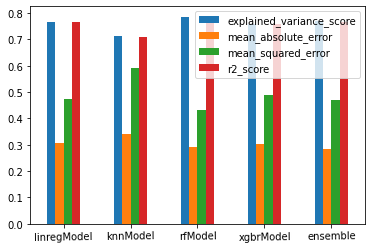

In [ ]:
eval.drop("max_error", axis=1).plot.bar(rot=1)

The performance of the linear regression model seems unusually good compared to the alternatives. However, one mayor reason is, that due to the nature of the model, predictions can be < 0. This was the case for 50 of the 215 predictions. Due to the bias of our dataset, this artifically improves the performance of this model.

We identified as our implementation of the Random Forest to be superior in all metrics except MAE where it scored 2nd after the ensemble

In [ ]:
linregPredictions = linregModel.predict(X_test)
print("# Predictions:", len(linregPredictions))
print("# Predictions < 0:", sum(1 for x in linregPredictions if x < 0))

# Predictions: 215
# Predictions < 0: 50


In [ ]:
predictions.sort_index(inplace=True)
predictions

,true,linregModel,knnModel,rfModel,xgbrModel,ensemble
6,0.0,0.0,0.0,1.0,1.0,0.0
17,0.0,-0.0,0.0,0.0,0.0,0.0
18,0.0,0.0,0.0,0.0,0.0,0.0
27,1.0,2.0,2.0,2.0,2.0,2.0
30,0.0,-0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...
2107,1.0,0.0,0.0,0.0,0.0,0.0
2110,0.0,-0.0,0.0,0.0,0.0,0.0
2114,0.0,0.0,0.0,0.0,0.0,0.0
2131,0.0,0.0,0.0,0.0,0.0,0.0
